In [143]:
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import fcluster

In [144]:
df = pd.read_csv("milk.csv", index_col = 0)
df.head(3)

,water,protein,fat,lactose,ash
Animal,,,,,
HORSE,90.1,2.6,1.0,6.9,0.35
ORANGUTAN,88.5,1.4,3.5,6.0,0.24
MONKEY,88.4,2.2,2.7,6.4,0.18


In [145]:
scaler = StandardScaler().set_output(transform = "pandas")
milk_scaled = scaler.fit_transform(df)

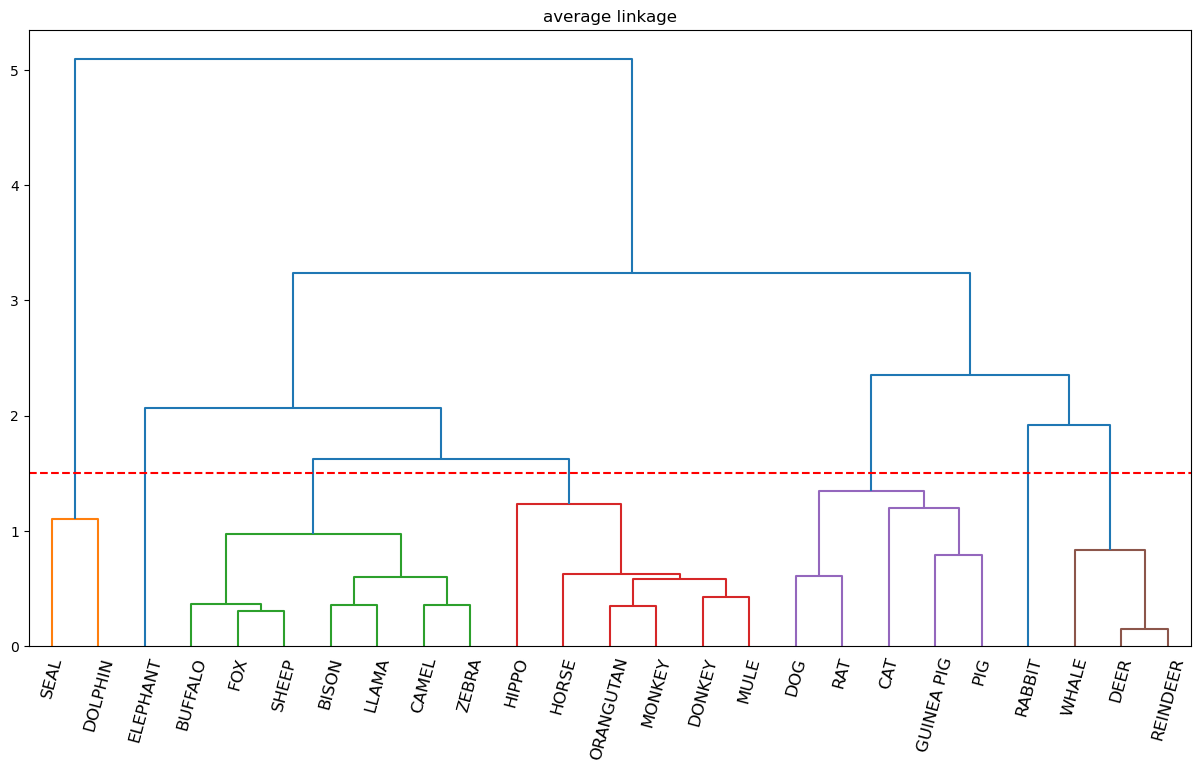

In [146]:
link = "average"
mergings =  linkage(milk_scaled, method = link)

distance_threshold = 1.5

plt.figure(figsize = (15, 8))
dendrogram(mergings, 
           labels = list(milk_scaled.index),
          color_threshold= distance_threshold
          )

plt.axhline(y=distance_threshold, color='r', linestyle='--')
plt.title(link + " linkage")
plt.xticks(rotation = 75, fontsize = 12)
plt.show()

In [147]:
# With AggloAgglomerativeClustering function

clust = AgglomerativeClustering(n_clusters= 7, 
                                linkage= "average",
                               )
clust.fit(milk_scaled)
clust.labels_

array([1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 2, 2, 1, 0, 2, 2, 0, 4, 5, 0, 6, 6,
       6, 3, 3], dtype=int64)

In [148]:
df_clust = pd.DataFrame({"Animal" : list(milk_scaled.index), "Cluster" : list(clust.labels_)})
df_clust.sort_values("Cluster")

,Animal,Cluster
19,RAT,0
16,DOG,0
13,PIG,0
9,CAT,0
8,GUINEA PIG,0
0,HORSE,1
12,MULE,1
1,ORANGUTAN,1
4,HIPPO,1
2,MONKEY,1


Evaluating silhouette scores for different number of clusters

In [150]:
scores = []
n_clust = [2, 3, 4, 5, 6] 
for i in n_clust :
    clust = AgglomerativeClustering(n_clusters = i, linkage = "average")
    clust.fit(milk_scaled)
    scores.append(silhouette_score(milk_scaled, clust.labels_))
print(scores)
i_max = np.argmax(scores)
n_clust[i_max]
print("Best no. of Clusters:", n_clust[i_max])

[0.5186847578981009, 0.48757649189546187, 0.416015383673761, 0.3830100222472541, 0.3742842300357041]
Best no. of Clusters: 2


# DBSCAN

In [194]:
from sklearn.cluster import DBSCAN

In [208]:
milk = pd.read_csv("milk.csv", index_col = 0)
scaler = StandardScaler().set_output(transform="pandas")
milkscaled = scaler.fit_transform(milk)
clust_DB = DBSCAN(eps = 1, min_samples = 4)
clust_DB.fit(milkscaled)
print(clust_DB.labels_)
print(len(set(clust_DB.labels_)))

[ 0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0 -1 -1 -1 -1 -1 -1 -1 -1
 -1]
2


In [214]:
eps_range = [0.2, 0.4, 0.6, 1]
mp_range = [2, 3, 4, 5]
cnt = 0
a = []

for i in eps_range:
    for j in mp_range:
        clust_DB = DBSCAN(eps = i, min_samples = j)
        clust_DB.fit(milkscaled.iloc[:,:5])
        if len(set(clust_DB.labels_)) > 2:
            cnt = cnt + 1
            milkscaled["Clust"] = clust_DB.labels_
            milk_scl_inliners = milkscaled[milkscaled["Clust"]!=-1]
            sil_sc = silhouette_score(milk_scl_inliners.iloc[:,:-1], milk_scl_inliners.iloc[:,-1])
            a.append([cnt, i, j, sil_sc])
            print(i, j, sil_sc)


a = np.array(a)
pa = pd.DataFrame(a, columns = ['Sr', 'eps', 'min_pt', 'sil'])   
print("Best Parameters")
pa[pa['sil'] == pa['sil'].max()]

0.4 2 0.6518937593821538
0.4 3 0.5385180352469559
0.6 2 0.5934459505692155
0.6 3 0.5344431042454363
0.6 4 0.5519747727201489
1 2 0.4344818095328392
1 3 0.6473871775367226
Best Parameters


,Sr,eps,min_pt,sil
0,1.0,0.4,2.0,0.651894


### Cluster Analysis

In [217]:
milk_clust = milk.copy()
milk_clust['cluster'] = clust_DB.labels_
milk_clust = milk_clust[milk_clust['cluster'] != -1]
milk_clust.groupby('cluster').mean()

,water,protein,fat,lactose,ash
cluster,,,,,
0,86.36,3.886667,4.033333,5.166667,0.628


In [219]:
arrests = pd.read_csv("USArrests.csv", index_col=0)
scaler = StandardScaler().set_output(transform="pandas")
arrestsscaled = scaler.fit_transform(arrests)
clust_DB = DBSCAN(eps = 1, min_samples = 4)
clust_DB.fit(arrestsscaled)
print(clust_DB.labels_)
print(len(set(clust_DB.labels_)))

[ 0 -1 -1 -1 -1 -1  1 -1 -1 -1 -1  1 -1  1  1  1  1  0  1 -1  1 -1  1 -1
  1  1  1 -1  1  1 -1 -1 -1  1  1  1  1  1  1  0  1  0 -1  1  1  1  1  1
  1  1]
3


In [221]:
arrest_clust = arrests.copy()
arrest_clust['cluster'] = clust_DB.labels_
arrest_clust = arrest_clust[arrest_clust['cluster'] != -1]
arrest_clust.groupby('cluster').mean()

,Murder,Assault,UrbanPop,Rape
cluster,,,,
0,14.050,238.000000,57.750000,23.200000
1,4.825,112.035714,63.357143,16.107143


In [223]:
arrest_clust.sort_values('cluster')

,Murder,Assault,UrbanPop,Rape,cluster
Alabama,13.2,236,58,21.2,0
Tennessee,13.2,188,59,26.9,0
Louisiana,15.4,249,66,22.2,0
South Carolina,14.4,279,48,22.5,0
West Virginia,5.7,81,39,9.3,1
Washington,4.0,145,73,26.2,1
Virginia,8.5,156,63,20.7,1
Vermont,2.2,48,32,11.2,1
Utah,3.2,120,80,22.9,1
South Dakota,3.8,86,45,12.8,1
